<a href="https://colab.research.google.com/github/esslic/PDS1920/blob/master/Classifaction_WeightDecay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Load data
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# load libraries
from fastai import *
from fastai.vision import *

In [5]:
# change working directory
!pwd
%cd ./drive/My\ Drive

/content/drive/My Drive


In [0]:
# select folder with training data
path = '/content/drive/My Drive/pds_group4/train/train'
label_cls = ['ALB', 'BET', 'DOL', 'LAG','OTHER', 'SHARK', 'YFT']

In [0]:
# create a random data bunch
np.random.seed(1)
data = ImageDataBunch.from_folder(path, train=".", 
                                  valid_pct=0.2,
                                  ds_tfms=get_transforms(), 
                                  size=224).normalize(imagenet_stats)

In [8]:
# 6 different fish species and 1 category 'other fish' 
data.classes

['ALB', 'BET', 'DOL', 'LAG', 'NoF', 'OTHER', 'SHARK', 'YFT']

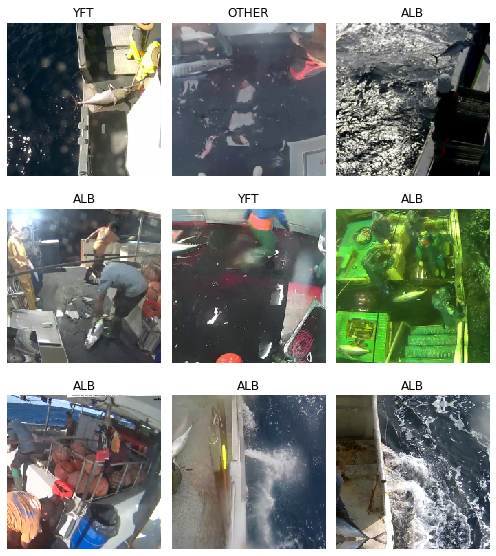

In [9]:
# show a random sample of pictures
data.show_batch(rows=3, figsize=(7,8))

In [0]:
# import metrics
from fastai.metrics import accuracy

In [0]:
# create learner
# Standardlerner
learn_standard = cnn_learner(data, models.resnet50, metrics= accuracy)

In [20]:
# Dazugehöriges Weight Decay
learn_standard.wd

0.01

In [0]:
# Standardlerner anpassen mit neuer Wheight Decay
learn = cnn_learner(data, models.resnet50, metrics= accuracy, wd=1e-1)

In [22]:
# Dazugehöriges Weight Decay
learn.wd

0.1

In [24]:
# Find learning rate
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 3.02E-03
Min loss divided by 10: 6.92E-03


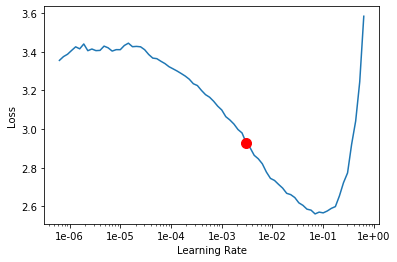

In [25]:
learn.recorder.plot(suggestion=True)

In [0]:
# Fit some layers of the CNN with the learning rate
learn.fit_one_cycle(5, max_lr=1e-02)

epoch,train_loss,valid_loss,accuracy,time
0,1.940523,1.270209,0.683060,31:54
1,1.268807,0.996315,0.659836,30:05
